In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os


In [2]:
files = [i for i in glob.glob('*s.{}'.format('csv'))]


In [3]:
files

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [4]:
import numpy as np
a=np.array([[1,2,3],[3,4,5]])
b=np.diff(a,axis=0)**2

In [5]:
b

array([[4, 4, 4]])

In [6]:
dfs = []
countries={'MX':'Mexico','IN':'India','DE':'Germany','JP':'Japan','KR':'South Korea','CA':'Canada','RU':'Russia','FR':'France','US':'USA','GB':'Great Britain'}
for csv in files:
    df = pd.read_csv(csv,encoding = "ISO-8859-1")
    df['country'] = countries[csv[0:2]]
    dfs.append(df)

In [7]:
final_df = pd.concat(dfs)

In [8]:
final_df['trending_date'] = pd.to_datetime(final_df['trending_date'],errors='coerce', format='%y.%d.%m')
final_df['publish_time'] = pd.to_datetime(final_df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

final_df = final_df[final_df['trending_date'].notnull()]
final_df = final_df[final_df['publish_time'].notnull()]


final_df.insert(4, 'publish_date', final_df['publish_time'].dt.date)
final_df['publish_time'] = final_df['publish_time'].dt.time
final_df['publish_date'] = pd.to_datetime(final_df['publish_date'],errors='coerce', format='%Y-%m-%d')

final_df['days_to_trend'] = (final_df['trending_date'] - final_df['publish_date']).dt.days 


In [9]:
final_df['category_id'] = final_df['category_id'].astype(str)

category_id = {}

with open('US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

final_df.insert(4, 'category', final_df['category_id'].map(category_id))
category_list = final_df['category'].unique()
category_list

array(['Entertainment', 'People & Blogs', 'News & Politics',
       'Howto & Style', 'Music', 'Comedy', 'Sports', 'Autos & Vehicles',
       'Film & Animation', 'Nonprofits & Activism', 'Education',
       'Science & Technology', 'Gaming', 'Pets & Animals',
       'Travel & Events', 'Shows', 'Movies', 'Trailers'], dtype=object)

In [10]:
final_df.head()

,video_id,trending_date,title,channel_title,category,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,days_to_trend
0,SbOwzAl9ZfQ,2017-11-14,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,Entertainment,2017-11-13,24,06:06:22,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Mexico,1
1,klOV6Xh-DnI,2017-11-14,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,People & Blogs,2017-11-13,22,05:11:58,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Mexico,1
2,6L2ZF7Qzsbk,2017-11-14,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,News & Politics,2017-11-13,25,17:00:02,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,Mexico,1
3,hcY52MFWMDM,2017-11-14,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,News & Politics,2017-11-13,25,03:47:10,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,Mexico,1
4,_OXDcGPVAa4,2017-11-14,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,Howto & Style,2017-11-13,26,19:17:48,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Mexico,1


In [11]:
final_df=final_df.dropna()
#final_df.to_csv('combinedDF.csv')

In [12]:
## RUN TILL HERE ONLY

In [13]:
final_dfUS=final_df[final_df['country']=='USA']
final_dfUK=final_df[final_df['country']=='Great Britain']
final_dfCAN=final_df[final_df['country']=='Canada']

In [14]:
from nltk.stem import LancasterStemmer, SnowballStemmer, RegexpStemmer, WordNetLemmatizer 
#this was part of the NLP notebook
import nltk
#import sentence tokenizer
from nltk import sent_tokenize
#import word tokenizer
from nltk import word_tokenize
#list of stopwords
from nltk.corpus import stopwords
import string
import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd

In [15]:
def remove_html(text):
    return BeautifulSoup(text, "lxml").text
import emoji
import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups
sp = spacy.load('en')
lookups = Lookups()
lemm = Lemmatizer(lookups)
#checking if a character is an emoji
def char_is_emoji(character):
    return character in emoji.UNICODE_EMOJI
#does the text contain an emoji?
def text_has_emoji(text):
    for character in text:
        if character in emoji.UNICODE_EMOJI:
            return True
    return False
#remove the emoji

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

punct =[]
punct += list(string.punctuation)
punct += '’'
punct.remove("'")

def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, ' ')
    return text

def lemma_function(text):
    dummy = []
    #this is just a test to see if it works
    for word in sp(text):
        dummy.append(word.lemma_)
    return ' '.join(dummy)

chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)



In [16]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)



In [17]:
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import Word
from textblob import TextBlob


In [18]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)


In [19]:
final_dfCAN['title']=final_dfCAN['title'].astype(str)
final_dfCAN['title'] = final_dfCAN['title'].apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))

final_dfCAN['title'] = final_dfCAN['title'].map(lambda x: x.lower())
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

final_dfCAN['title'] = final_dfCAN['title'].apply(lambda text: remove_urls(text))

from bs4 import BeautifulSoup
final_dfCAN['title'] = final_dfCAN['title'].apply(lambda x: x.replace('\n', ' '))

final_dfCAN['title'] = final_dfCAN['title'].apply(lambda x: remove_html(x))

# Remove numbers
final_dfCAN['title'] = final_dfCAN['title'].map(lambda x: re.sub(r'\d+', '', x))

# Remove Punctuation
final_dfCAN['title']  = final_dfCAN['title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

final_dfCAN['title']=final_dfCAN['title'].apply(lambda text: remove_punctuations(text))

# Remove white spaces
final_dfCAN['title'] = final_dfCAN['title'].map(lambda x: x.strip())

/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [20]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

final_dfCAN["title"] = final_dfCAN["title"].apply(lambda text: remove_emoji(text))
final_dfCAN['title'] = final_dfCAN['title'].apply(lambda text: remove_emoticons(text))
final_dfCAN['title'] = final_dfCAN['title'].apply(lambda text: chat_words_conversion(text))
final_dfCAN["title"] = final_dfCAN["title"].apply(lambda text: lemmatize_words(text))
final_dfCAN['title']=final_dfCAN['title'].str.split()
final_dfCAN['title'] = final_dfCAN['title'].apply(lambda final_df: [x for x in final_df if x.isalpha()])
final_dfCAN['title']=final_dfCAN['title'].str.join(' ')

/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [21]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

final_dfCAN['title'] = final_dfCAN['title'].apply(lambda text: remove_stopwords(text))

/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
final_dfUS.head()

,video_id,trending_date,title,channel_title,category,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,days_to_trend
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,USA,2
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,USA,1
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,USA,2


In [23]:
final_dfCAN['tags']=final_dfCAN['tags'].str.replace('"','').str.lower().str.split('|')
def numberoftags(x):
    return len(x) # remove all the 8s 
final_dfCAN['numberOfTags']=final_dfCAN['tags'].apply(lambda text: numberoftags(text))
final_dfCAN['tags']=final_dfCAN['tags'].str.join(' ')

final_dfCAN['tags'] = final_dfCAN['tags'].apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))


/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [24]:
final_dfCAN['title'].head()

0                  eminem walk water audio ft beyoncã
1                         plush bad unboxing fan mail
2    racist superman rudy mancuso king bach lele pons
3                                     dare going bald
4             ed sheeran perfect official music video
Name: title, dtype: object

In [25]:
def join(x):
    x= ' '.join(x).lower()
    x=x.split("''") # remove all the 8s 
    return ' '.join(x)

In [26]:
final_dfCAN['PublishDay']=final_dfCAN['publish_date'].dt.dayofweek

/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
final_dfCAN['PublishMonth']=final_dfCAN['publish_date'].dt.month

/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
final_dfCAN['PublishYear']=final_dfCAN['publish_date'].dt.year

/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
final_dfCAN['title']

0                       eminem walk water audio ft beyoncã
1                              plush bad unboxing fan mail
2         racist superman rudy mancuso king bach lele pons
3                                          dare going bald
4                  ed sheeran perfect official music video
                               ...                        
40876                                        solve mystery
40877                           eli lik lik episode partie
40878    kingdom heart iii â square enix e showcase tra...
40879                        trump advisor grovels trudeau
40880                                           ãåæçãéåæææ
Name: title, Length: 39585, dtype: object

In [30]:
max(final_dfCAN['PublishYear'])

2018

In [31]:
final_dfCAN['publish_hour']=final_dfCAN['publish_time'].astype(str).str.slice(0,2).astype(int)

/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
final_dfCAN['publish_min']=final_dfCAN['publish_time'].astype(str).str.slice(3,5).astype(int)

/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
#final_dfUS.nunique()

In [34]:
#!pip install vaderSentiment

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [36]:
sid_obj = SentimentIntensityAnalyzer() 

In [37]:
final_dfCAN['TitleSentiment'] = final_dfCAN['title'].apply(lambda x: sid_obj.polarity_scores(str(x)))

/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
final_dfCAN['TitleSentiment'] = final_dfCAN['TitleSentiment'].apply(lambda x: x.get('compound'))

/Users/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
final_dfCAN['trending_date'].nunique()

205

In [40]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union


In [41]:
ml=final_dfCAN.drop(['trending_date','video_id','trending_date','publish_date','category_id','publish_time','tags'],axis=1)

In [42]:
#ml=ml.reset_index()

In [43]:
#ml.info()

In [44]:
#ml.rename(columns={"y": "SentimentTitle"},inplace=True)

In [45]:
#ml['title'].value_counts()

In [46]:
X=ml[['title','channel_title','category','likes','dislikes','comment_count','comments_disabled','ratings_disabled','video_error_or_removed','country','days_to_trend','numberOfTags','PublishDay','PublishMonth','PublishYear','publish_hour','publish_min','TitleSentiment']]

In [47]:
#X2=ml[['channel_title','category','likes','dislikes','comment_count','comments_disabled','ratings_disabled','video_error_or_removed','country','days_to_trend','numberOfTags','PublishDay','PublishMonth','PublishYear','publish_hour','publish_min','SentimentTitle','tags1']]

In [48]:
#X.head()

In [49]:
y=ml['views']

In [50]:
X.shape

(39585, 18)

In [51]:
df = pd.get_dummies(X, columns=['category'],drop_first=True)

In [52]:
df = pd.get_dummies(df, columns=['country'],drop_first=True)

In [109]:
df['numberOfTags'].median()

19.0

In [54]:
df_frequency_map_channel = df.channel_title.value_counts().to_dict()
df['Channel_Count'] = df['channel_title'].map(df_frequency_map_channel)

In [55]:
df_frequency_map_channel2 = df.title.value_counts().to_dict()
df['title'] = df['title'].map(df_frequency_map_channel2)

In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['channel_title']=le.fit_transform(df['channel_title'])

In [57]:
le1 = preprocessing.LabelEncoder()
df['comments_disabled']=le.fit_transform(df['comments_disabled'])

In [58]:
le2 = preprocessing.LabelEncoder()
df['ratings_disabled']=le.fit_transform(df['ratings_disabled'])

In [59]:
le3 = preprocessing.LabelEncoder()
df['video_error_or_removed']=le.fit_transform(df['video_error_or_removed'])

In [60]:
le4 = preprocessing.LabelEncoder()
df['video_error_or_removed']=le.fit_transform(df['video_error_or_removed'])

In [61]:
le5 = preprocessing.LabelEncoder()
df['title']=le5.fit_transform(df['title'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39585 entries, 0 to 40880
Data columns (total 33 columns):
title                             39585 non-null int64
channel_title                     39585 non-null int64
likes                             39585 non-null int64
dislikes                          39585 non-null int64
comment_count                     39585 non-null int64
comments_disabled                 39585 non-null int64
ratings_disabled                  39585 non-null int64
video_error_or_removed            39585 non-null int64
days_to_trend                     39585 non-null int64
numberOfTags                      39585 non-null int64
PublishDay                        39585 non-null int64
PublishMonth                      39585 non-null int64
PublishYear                       39585 non-null int64
publish_hour                      39585 non-null int64
publish_min                       39585 non-null int64
TitleSentiment                    39585 non-null float64
category_

In [63]:
from sklearn.model_selection import train_test_split


In [64]:
trainX, testX, trainY, testY = train_test_split(df, y, test_size=0.3)


In [65]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27709 entries, 7904 to 35774
Data columns (total 33 columns):
title                             27709 non-null int64
channel_title                     27709 non-null int64
likes                             27709 non-null int64
dislikes                          27709 non-null int64
comment_count                     27709 non-null int64
comments_disabled                 27709 non-null int64
ratings_disabled                  27709 non-null int64
video_error_or_removed            27709 non-null int64
days_to_trend                     27709 non-null int64
numberOfTags                      27709 non-null int64
PublishDay                        27709 non-null int64
PublishMonth                      27709 non-null int64
PublishYear                       27709 non-null int64
publish_hour                      27709 non-null int64
publish_min                       27709 non-null int64
TitleSentiment                    27709 non-null float64
catego

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_jobs = -1, n_estimators = 500, max_features = 0.49, max_depth = 10, min_samples_leaf = 2)


In [67]:
rf.fit(trainX,trainY)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=0.49, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [68]:
rf.score(testX,testY)

0.8564357137886572

In [69]:
rf.score(trainX,trainY)

0.9597997858528868

In [70]:
df.to_csv('X.csv')

In [71]:
feat_importance = rf.feature_importances_

feature_cols = trainX.columns
feat_imp_dict = dict(zip(feature_cols, rf.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
res=feat_imp.sort_values(by=0, ascending=True)


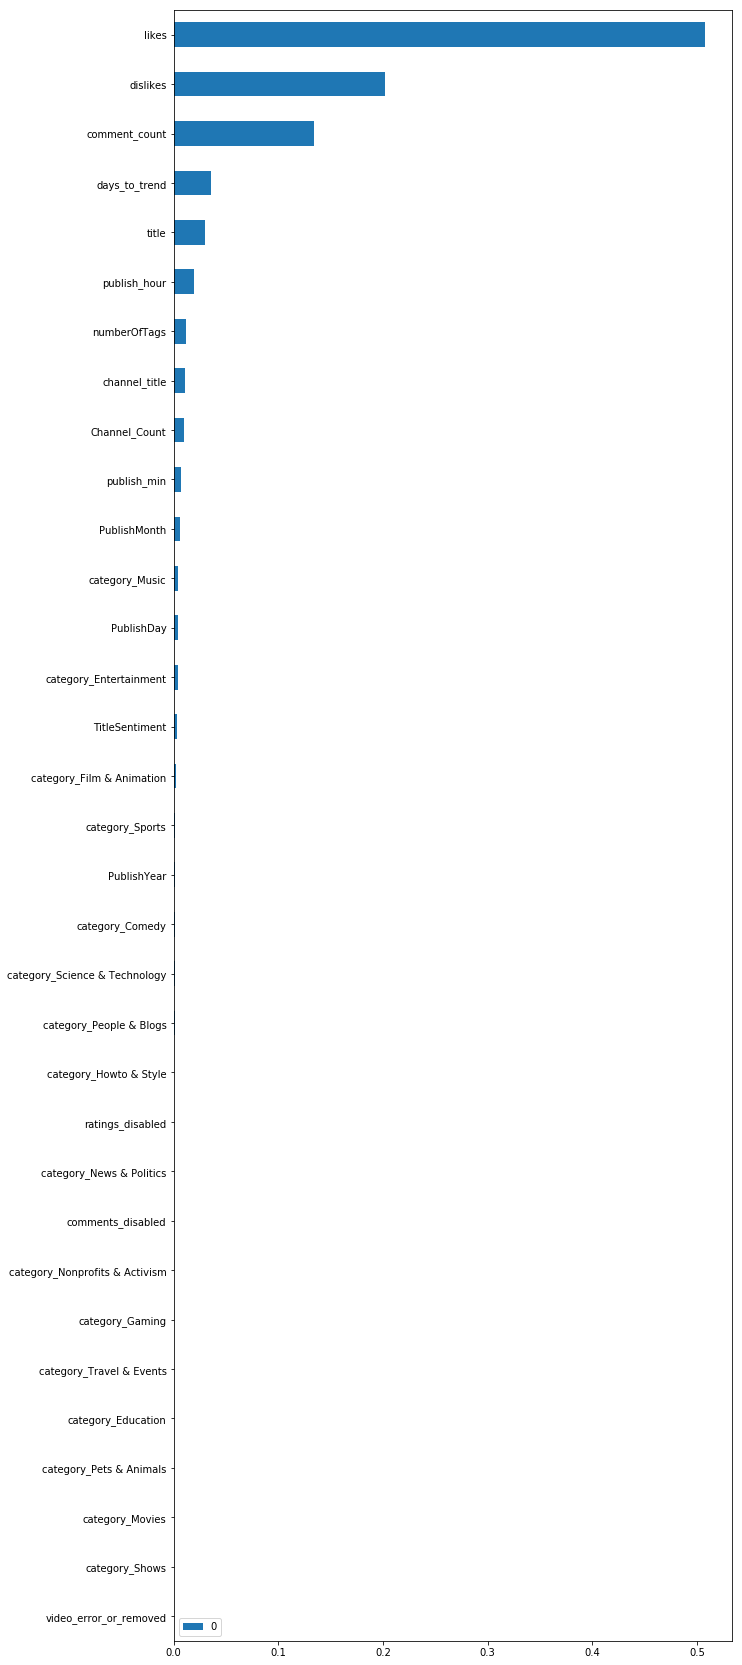

In [72]:
res.plot(kind='barh', figsize=(10,30))

In [73]:
import numpy as np

In [74]:
print("Root Mean Squared Error: %.4f" % np.sqrt(np.mean((rf.predict(testX) - testY) ** 2)))

Root Mean Squared Error: 1251039.1413


In [75]:
max(y)

137843120

In [76]:
y.describe()

count    3.958500e+04
mean     1.169234e+06
std      3.437842e+06
min      7.330000e+02
25%      1.497150e+05
50%      3.831200e+05
75%      9.831390e+05
max      1.378431e+08
Name: views, dtype: float64

In [77]:
pred=rf.predict(testX)

In [78]:
import matplotlib.pyplot as plt

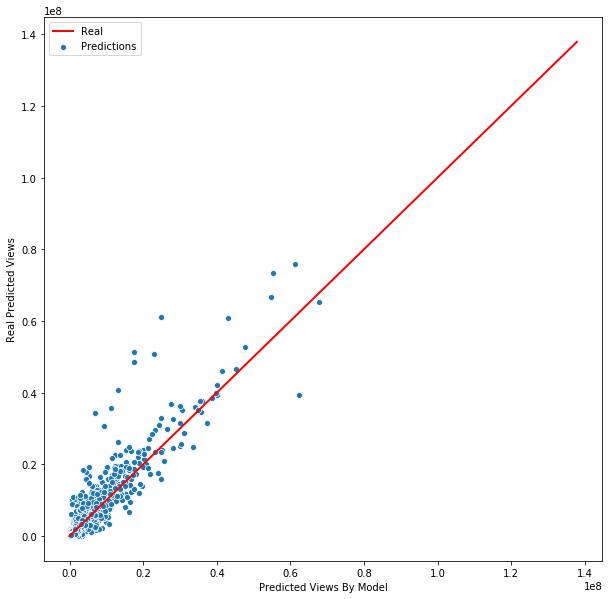

In [79]:
plt.figure(figsize=(10,10))

ax=sns.scatterplot(pred, testY,label="Predictions")
ax=sns.lineplot([0,137843120], [0, 137843120], linewidth=2,color='red',label='Real')

ax.set(xlabel='Predicted Views By Model', ylabel='Real Predicted Views')

plt.show()

In [80]:
corr = (testX.join(testY)).corr()
#plt.figure(figsize=(20,15))
#sns.heatmap(corr,annot=True,cmap="viridis")

In [81]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.graph_objs import *
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

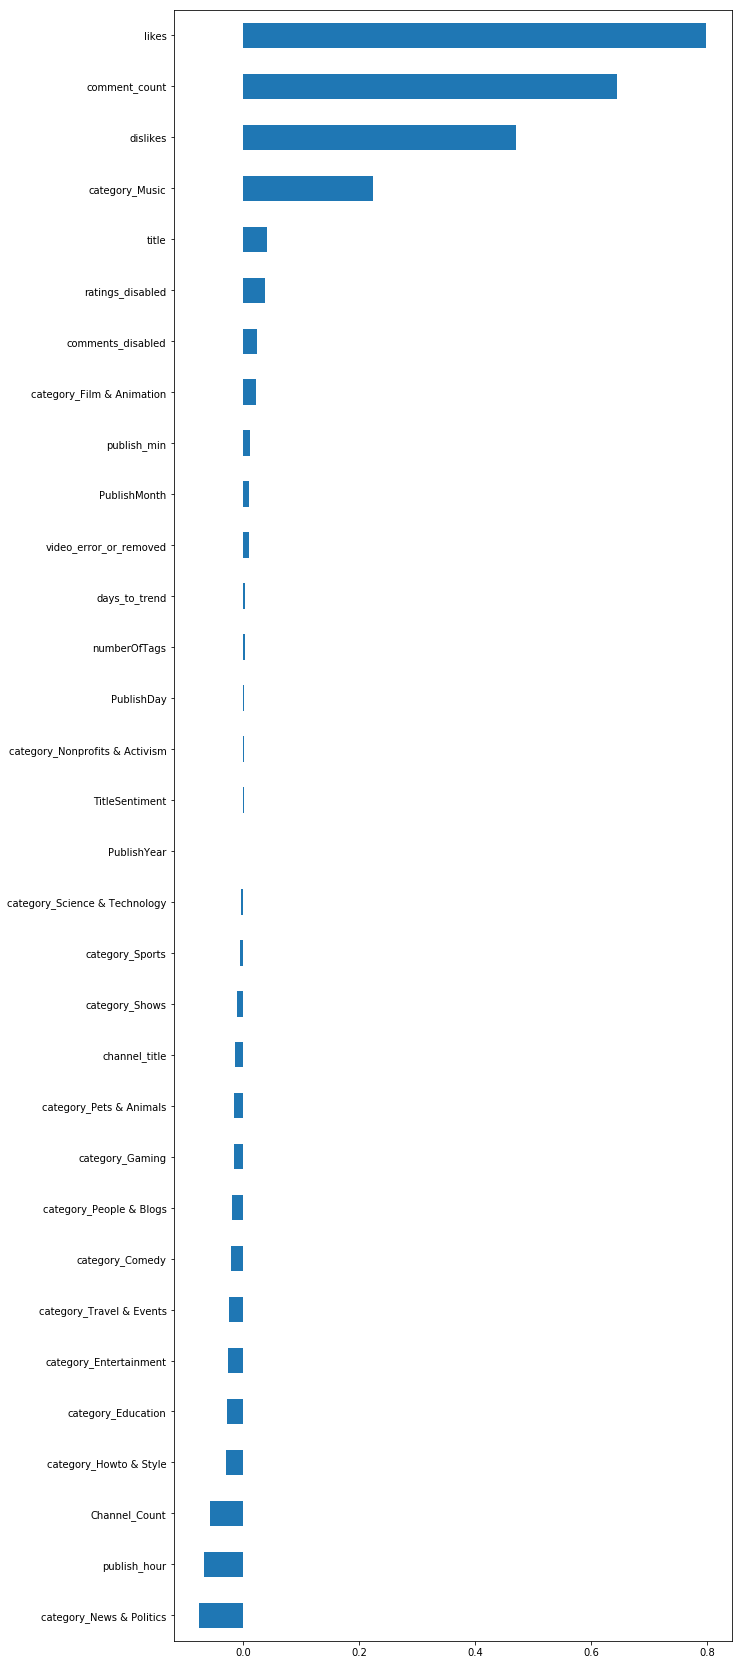

In [82]:
corr['views'].drop(['views','category_Movies']).sort_values( ascending=True).plot(kind='barh', figsize=(10,30))

In [83]:
final_dfCAN['tags']

0        eminem walk on water aftermathshadyinterscope rap
1        plush bad unboxing unboxing fan mail idubbbztv...
2        racist superman rudy mancuso king bach racist ...
3        ryan higa higatv nigahiga i dare you idy rhpc ...
4        edsheeran ed sheeran acoustic live cover offic...
                               ...                        
40876    annoying orange funny fruit talking animation ...
40877    hkayet tounsia elhiwar ettounsi denya okhra ou...
40878    kingdom hearts kh3 kingdom hearts 3 frozen squ...
40879    180612tb02sorryexcuse news politics the young ...
40880    å³åæ² å³åå åææåèç sandy jacky wu æ²å äåçåå ch3...
Name: tags, Length: 39585, dtype: object

In [84]:
!pip install wordcloud

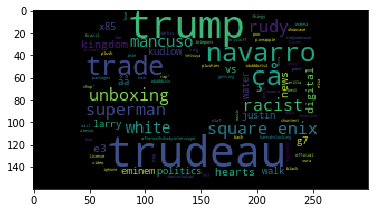

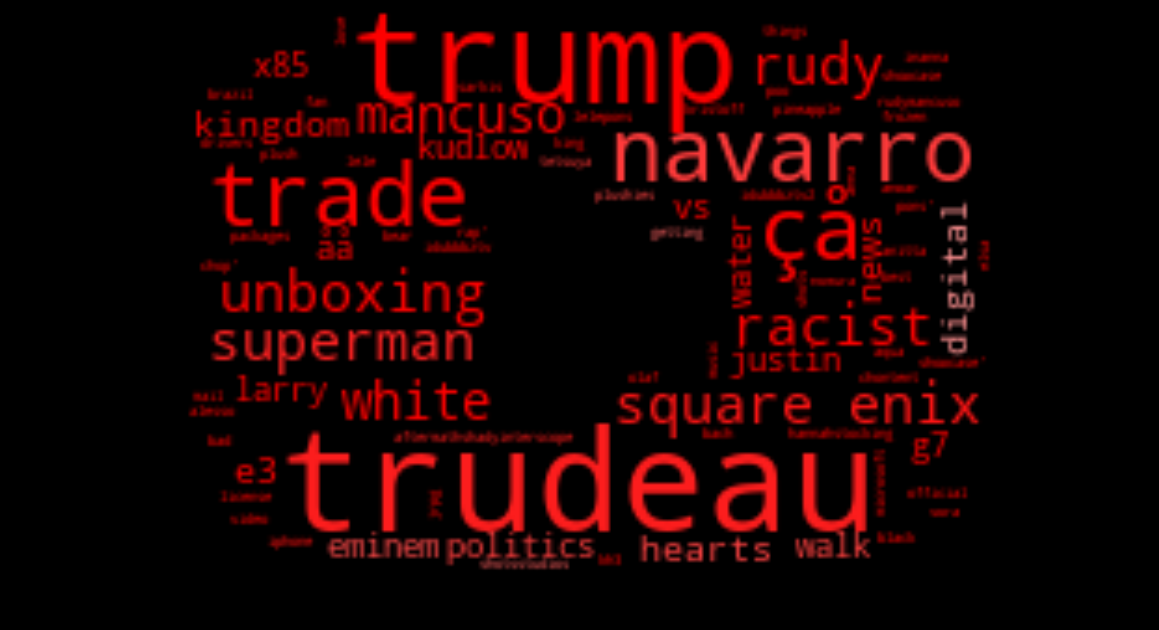

In [85]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = final_dfCAN.tags.values

# load image. This has been modified in gimp to be brighter and have more saturation.
parrot_color = np.array(Image.open(os.path.join(d, "yt.jpg")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
parrot_color = parrot_color[::3, ::3]

# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=10000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate(str(text))
plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(20, 20),facecolor = 'k',edgecolor = 'k')
plt.imshow(wc, interpolation="bilinear")

wc.to_file("parrot_new.png")

plt.show()

In [86]:
#dftags=testX[(testX['PublishYear']==2018) & (testX['PublishMonth']==2) & (testX['country_USA']==1)]

In [87]:
#ml[ml[['numberOfTags','SentimentTitle']]==dftags[['numberOfTags','SentimentTitle']]]

In [88]:
#os.chdir('zip')

In [89]:
#files = [i for i in glob.glob('*.{}'.format('csv'))]


In [90]:
#files

In [91]:
#pd.read_csv('relatedQueriesGames.csv')

In [92]:
#for csv in files:
#    with open(csv, 'r') as file:
#        d = file.read().replace('\n', ' ')
 #   d+=d

In [93]:
#result = ' '.join(c for c in re.sub(r'\d+', '', d).split() if c.isalpha())

In [94]:
#result

In [95]:
#tags=result.lower().split()

In [96]:
#tags

In [97]:
#index=dftags.reset_index()['index']

In [98]:
#index

In [99]:
#dftags['tags']=ml[ml['index'].isin(index)]['tags1']

In [100]:
#dftags['views']=ml[ml['index'].isin(index)]['views']
#dftags['tags'].dropna(inplace=True)

In [101]:
#def jaccard_similarity(list1, list2):
#    intersection = len(list(set(list1).intersection(list2)))
#    return float(intersection)

#dftags['tagScore'] = dftags['tags'].apply(lambda x: jaccard_similarity(x,tags))

In [102]:
#withpostjaccscore=dftags[dftags['tagScore']>0]

In [103]:
#withpostjaccscore

In [104]:
#max(withpostjaccscore['tagScore'])

In [105]:
#import numpy as np
#np.corrcoef(withpostjaccscore['tagScore'],withpostjaccscore['views'])

In [106]:
#sns.boxplot(withpostjaccscore['tagScore'],withpostjaccscore['views'])